## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.05063507],
       [0.33611333],
       [0.34968764],
       [0.36375084],
       [0.37661818]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.05061344,  0.32982041,  0.34260437,  0.35578214,  0.36777777,
        0.39696342,  0.40775037,  0.47088208,  0.5291472 ,  0.57231415,
        0.79015968,  0.79064647,  0.86017338,  0.91873413,  0.97219044,
        0.98964783,  0.99631378,  0.99997212,  0.99884698,  0.85605159,
        0.78796139,  0.694748  ,  0.63326891,  0.62820166,  0.45894197,
        0.44654588,  0.37939784,  0.27617003,  0.27300687,  0.26233531,
        0.25538716,  0.22742176, -0.1945261 , -0.44923294, -0.57362056,
       -0.68457486, -0.71778341, -0.97953978, -0.99320193, -0.99936655])

In [5]:
np.sin( X )[:5]

array([[0.05061344],
       [0.32982041],
       [0.34260437],
       [0.35578214],
       [0.36777777]])

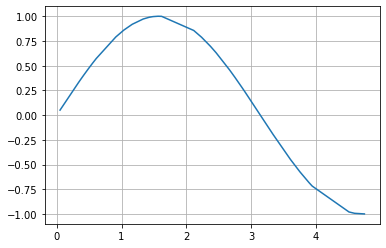

In [6]:
plt.plot( X, y )
plt.grid()
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

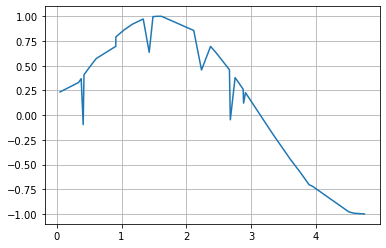

In [8]:
plt.plot( X, y )
plt.grid()
plt.show();

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 2

In [12]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

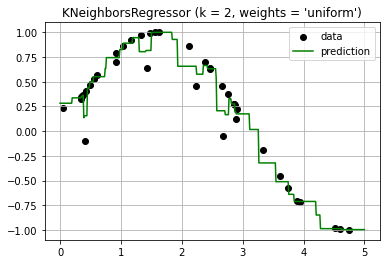

In [14]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.grid()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

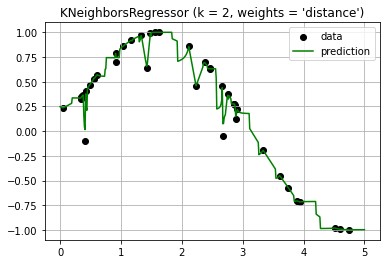

In [15]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.grid()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()